In [1]:
!kaggle datasets download -d subhajournal/phishingemails

Dataset URL: https://www.kaggle.com/datasets/subhajournal/phishingemails
License(s): GNU Lesser General Public License 3.0
 55% 10.0M/18.0M [00:00<00:00, 32.7MB/s]
100% 18.0M/18.0M [00:00<00:00, 56.2MB/s]


In [2]:
!unzip /content/phishingemails.zip

Archive:  /content/phishingemails.zip
  inflating: Phishing_Email.csv      


### Importing libraries


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

### Data importing and Preprocessing

In [4]:
#Import the Dataset
df= pd.read_csv("/content/Phishing_Email.csv")
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [5]:
# Check NAN values
df.isna().sum()

,0
Unnamed: 0,0
Email Text,16
Email Type,0


In [6]:
#Drop tha Na values
df = df.dropna()
print(df.isna().sum())

Unnamed: 0    0
Email Text    0
Email Type    0
dtype: int64


In [7]:
#dataset shape
df.shape

(18634, 3)

In [8]:
# Count the occurrences of each E-mail type.
email_type_counts = df['Email Type'].value_counts()
print(email_type_counts)


Email Type
Safe Email        11322
Phishing Email     7312
Name: count, dtype: int64


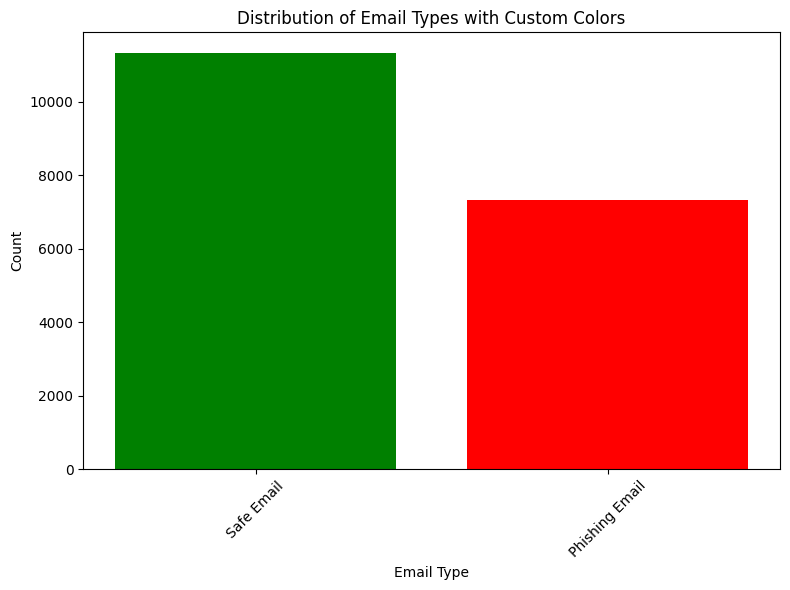

In [10]:
# Create the bar chart
# Create a list of unique email types
unique_email_types = email_type_counts.index.tolist()

# Define a custom color map
color_map = {
    'Phishing Email': 'red',
    'Safe Email': 'green',}

# Map the colors to each email type
colors = [color_map.get(email_type, 'gray') for email_type in unique_email_types]

# Create the bar chart with custom colors
plt.figure(figsize=(8, 6))
plt.bar(unique_email_types, email_type_counts, color=colors)
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Distribution of Email Types with Custom Colors')
plt.xticks(rotation=45)

# Show the chart
plt.tight_layout()
plt.show()


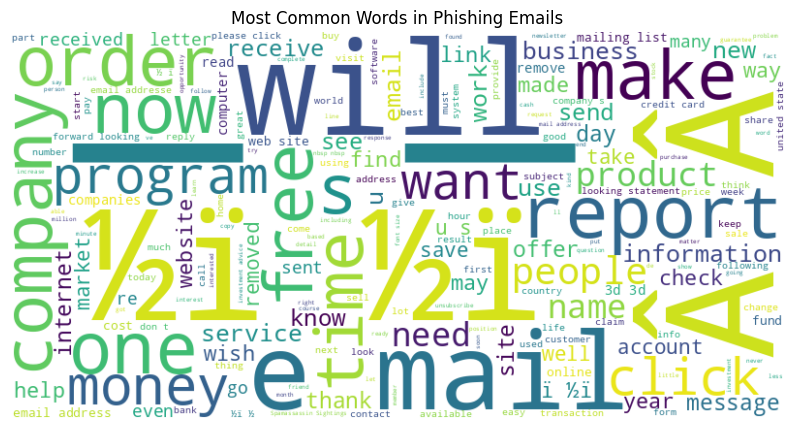

In [14]:
from wordcloud import WordCloud

# Filter phishing emails
phishing_emails = " ".join(df[df['Email Type'] == 'Phishing Email']['Email Text'])

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(phishing_emails)

# Display Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Phishing Emails')
plt.show()


<ipython-input-16-1bafac620ea6>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[word[0] for word in phishing_top_words], y=[word[1] for word in phishing_top_words], ax=axes[0], palette='Reds_r')
<ipython-input-16-1bafac620ea6>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
<ipython-input-16-1bafac620ea6>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[word[0] for word in safe_top_words], y=[word[1] for word in safe_top_words], ax=axes[1], palette='Greens_r')
<ipython-input-16-1bafac620ea6>:22: UserWarning: set_ticklabels() should o

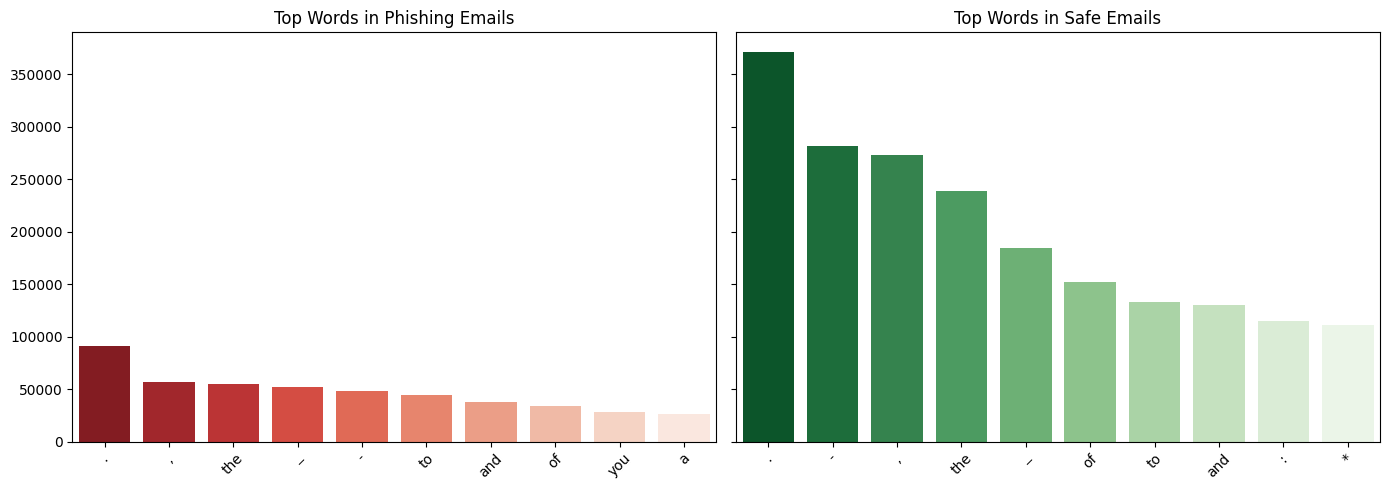

In [16]:
def get_top_words(text, n=20):
    words = " ".join(text).split()
    return Counter(words).most_common(n)

# Top words for Phishing Emails
phishing_top_words = get_top_words(df[df['Email Type'] == 'Phishing Email']['Email Text'], 10)
safe_top_words = get_top_words(df[df['Email Type'] == 'Safe Email']['Email Text'], 10)

# Bar plot for Top Words
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Phishing Emails
sns.barplot(x=[word[0] for word in phishing_top_words], y=[word[1] for word in phishing_top_words], ax=axes[0], palette='Reds_r')
axes[0].set_title('Top Words in Phishing Emails')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Safe Emails
sns.barplot(x=[word[0] for word in safe_top_words], y=[word[1] for word in safe_top_words], ax=axes[1], palette='Greens_r')
axes[1].set_title('Top Words in Safe Emails')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


### Strategies for Handling Imbalance

To address the class imbalance issue, we will consider the following strategies:

#### 1. Resampling Techniques

   a. **Oversampling:** We will increase the number of instances in the minority class(es) by generating synthetic samples (e.g., using SMOTE) to balance the class distribution.

   b. **Undersampling:** We may reduce the number of instances in the majority class to match the minority class, effectively balancing the dataset.

In [18]:
# We will use undersapling technique
Safe_Email = df[df["Email Type"]== "Safe Email"]
Phishing_Email = df[df["Email Type"]== "Phishing Email"]
Safe_Email = Safe_Email.sample(Phishing_Email.shape[0])

In [19]:
# lets check the sahpe again
Safe_Email.shape,Phishing_Email.shape

((7312, 5), (7312, 5))

In [20]:
# lest create a new Data with the balanced E-mail types
Data= pd.concat([Safe_Email, Phishing_Email], ignore_index = True)
Data.head()

,Unnamed: 0,Email Text,Email Type,Word Count,Email Length
0,6386,syllable structure and gesture timing call for...,Safe Email,603,3445
1,17162,cfp : spatial expressions ( < first call for p...,Safe Email,655,3810
2,7745,re : power point slides about enron vince - pl...,Safe Email,214,1028
3,3671,re : deal # 529159 for december 2000 janet wal...,Safe Email,321,1187
4,17109,preliminary announcement of jakobson conferenc...,Safe Email,378,1381


### Our Dataset is ready

#Training


We will train our model using Federated Learning

In [24]:
# split the data into a metrix of features X and Dependent Variable y
X = Data["Email Text"].values
y = Data["Email Type"].values

In [29]:
from sklearn.model_selection import train_test_split

# Simulate 5 clients
num_clients = 5
client_data = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

client_data = [
    train_test_split(X_train[i::num_clients], y_train[i::num_clients], test_size=0.2)
    for i in range(num_clients)
]


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

# Simulate 5 clients
num_clients = 5
client_data = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split data among clients
client_data = [
    train_test_split(X_train[i::num_clients], y_train[i::num_clients], test_size=0.2, random_state=42)
    for i in range(num_clients)
]

# Initialize TF-IDF Vectorizer and fit on the training data
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)

# Extract client data (X_train_client and y_train_client)
X_clients = [vectorizer.transform(client[0]) for client in client_data]  # X_train_client
y_clients = [client[2] for client in client_data]                       # y_train_client

# Train each client's model
client_models = []
for i, X_client in enumerate(X_clients):
    model = SVC()  # Or RandomForestClassifier()
    model.fit(X_client, y_clients[i])
    client_models.append(model)

print("Client models trained successfully!")


Client models trained successfully!


#Evaluation

In [31]:
# Ensure the vectorizer is already trained on the training data
X_test_tfidf = vectorizer.transform(X_test)


In [32]:
import numpy as np
from sklearn.metrics import accuracy_score
from collections import Counter

# Function for aggregating predictions using majority voting
def aggregate_predictions(client_models, X_test):
    # Each client model predicts on the test data
    predictions = np.array([model.predict(X_test) for model in client_models], dtype=object)

    # Use a majority vote across all client models
    final_predictions = []
    for i in range(predictions.shape[1]):  # Iterate over each sample
        sample_preds = predictions[:, i]
        most_common = Counter(sample_preds).most_common(1)[0][0]
        final_predictions.append(most_common)

    return np.array(final_predictions)

# Aggregate predictions from all client models
final_predictions = aggregate_predictions(client_models, X_test_tfidf)

# Evaluate the final predictions
accuracy = accuracy_score(y_test, final_predictions)
print("Global Model Accuracy (Majority Voting):", accuracy)


Global Model Accuracy (Majority Voting): 0.961025641025641


#Saving Model

In [34]:
import joblib

# Save each client model
for idx, model in enumerate(client_models):
    joblib.dump(model, f"client_model_{idx}.pkl")

# Save the TF-IDF vectorizer
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

print("Models and vectorizer saved successfully!")


Models and vectorizer saved successfully!
